# Tesla Gigafactory in Brandenburg 

### Eine Untersuchung der Einstellung der Anwohner auf Grundlage der Sentiment Analyse von Twitter Daten

##### Vladimir Burlay

In [2]:
library("twitteR")
library("ROAuth")
library("modest")
library("httr")
library("tidyverse")
library("lubridate")
library("twitteR")
library("ROAuth")
library("modest")
library("httr")
library("tidyverse")
library("lubridate")
library("NLP")
library("tm")
library("stringr")
library("RCurl")
library("base64enc")
library("ggplot2")
library("wordcloud")
library("wordcloud2")

In [3]:
rm(list=ls()) # Clear the workspace
graphics.off() # Clear graphics

In [4]:
appname <- "Tesla_Deutschland"
requestURL <- "https://api.twitter.com/oauth/request_token"
accessURL <- "http://api.twitter.com/oauth/request_token"
authURL <- "https://api.twitter.com/oauth/authorize"
consumerKey <- "w0PvfM0RYDOiSE0wt5cGwGvsE"
consumerSecret <- "86ICYBhyAXFJP0ptksNDC84IreCj5ra0wZzaAP9KLv8gnLTfny"
accessToken = "1257760441759039491-DAa9FuFn6i9E5rOGhck6LHMRRfmP9Z"
accessSecret = "mcRPGNHWWO5yd7oyxJoAppu2Yij5ZaiQyo9EbxmT1XCj8"

In [5]:
setup_twitter_oauth(consumer_key = consumerKey,
                    consumer_secret = consumerSecret,
                    access_token = accessToken,
                    access_secret = accessSecret)

[1] "Using direct authentication"


Um die Hashtag-Analyse mit R zu demonstrieren, 
wird hier das Hashtag-Schlüsselwort #GigaBerlin Nummer eins für die Studie ausgewählt.
Abgesehen von diesem Suchschlüsselwort erfordert die Funktion searchTwitter ()
auch die maximale Anzahl von Tweets, die der Funktionsaufruf von den Tweets zurückgibt. 
Betrachten wir für diese Diskussion die maximale Anzahl als 500. 
Abhängig von der Geschwindigkeit Ihres Internets und 
dem Datenverkehr auf dem Twitter-Server erhalten Sie innerhalb
weniger Minuten eine Antwort auf ein R-Listenklassenobjekt und ein R-Listenklassenobjekt

In [6]:
tweets <- searchTwitter("#GigaBerlin" ,lang ="en", n = 500)
mode(tweets)

[1] "list"

In [9]:
length(tweets)

[1] 500

In [7]:
str(head(tweets,1))

List of 1
 $ :Reference class 'status' [package "twitteR"] with 17 fields
  ..$ text         : chr "Good morning #GigaBerlin https://t.co/xvCLDxx9SR"
  ..$ favorited    : logi FALSE
  ..$ favoriteCount: num 0
  ..$ replyToSN    : chr(0) 
  ..$ created      : POSIXct[1:1], format: "2020-05-22 05:07:35"
  ..$ truncated    : logi FALSE
  ..$ replyToSID   : chr(0) 
  ..$ id           : chr "1263697996086153216"
  ..$ replyToUID   : chr(0) 
  ..$ statusSource : chr "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>"
  ..$ screenName   : chr "deineglotze"
  ..$ retweetCount : num 0
  ..$ isRetweet    : logi FALSE
  ..$ retweeted    : logi FALSE
  ..$ longitude    : chr(0) 
  ..$ latitude     : chr(0) 
  ..$ urls         :'data.frame':	0 obs. of  4 variables:
  .. ..$ url         : chr(0) 
  .. ..$ expanded_url: chr(0) 
  .. ..$ dispaly_url : chr(0) 
  .. ..$ indices     : num(0) 
  ..and 53 methods, of which 39 are  possibly relevant:
  ..  getCreated, 

In [ ]:
Da der Datenrahmen die effizienteste Struktur für die Verarbeitung von Datensätzen ist,
ist es jetzt erforderlich, jedes Listenelement in den Datenrahmen zu konvertieren und
diese zeilenweise in einen einzelnen Rahmen zu binden.
Dies kann auf elegante Weise mit dem Funktionsaufruf do.call () erfolgen,
wie hier gezeigt:

In [8]:
tweetsDF<- do.call("rbind",lapply(tweets, as.data.frame))

In [ ]:
Die Funktion lapply () konvertiert zuerst jede Liste in einen Datenrahmen, 
dann bindet do.call () diese nacheinander. Jetzt haben wir eine Reihe 
von Datensätzen mit 16 Feldern (eines weniger als die Liste!) 
In einem regulären Format zur Analyse bereit.
Hier werden wir hauptsächlich das "erstellte" Feld betrachten,
um das Verteilungsmuster der Ankunft von Tweets zu untersuchen.

In [9]:
length(head(tweetsDF,1))

[1] 16

In [10]:
str(head(tweetsDF,1))

'data.frame':	1 obs. of  16 variables:
 $ text         : chr "Good morning #GigaBerlin https://t.co/xvCLDxx9SR"
 $ favorited    : logi FALSE
 $ favoriteCount: num 0
 $ replyToSN    : chr NA
 $ created      : POSIXct, format: "2020-05-22 05:07:35"
 $ truncated    : logi FALSE
 $ replyToSID   : chr NA
 $ id           : chr "1263697996086153216"
 $ replyToUID   : chr NA
 $ statusSource : chr "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>"
 $ screenName   : chr "deineglotze"
 $ retweetCount : num 0
 $ isRetweet    : logi FALSE
 $ retweeted    : logi FALSE
 $ longitude    : logi NA
 $ latitude     : logi NA


In [11]:
tweetsDF

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
<chr>,<lgl>,<dbl>,<chr>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
Good morning #GigaBerlin https://t.co/xvCLDxx9SR,FALSE,0,NA,2020-05-22 05:07:35,FALSE,NA,1263697996086153216,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",deineglotze,0,FALSE,FALSE,NA,NA
So this is where @Tesla got the idea from for the new and improved paint shop at #GigaBerlin think? https://t.co/HrZTMKguCv,FALSE,0,NA,2020-05-22 03:08:57,FALSE,NA,1263668139973390336,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",eburrowes,0,FALSE,FALSE,NA,NA
RT @berlu135: #Luxembourg raises #EV incentives from 5000€ to 8000€ on sales before 31.3.21 and delivery before 31.12.21! #Tesla #GigaBerli…,FALSE,0,NA,2020-05-21 21:53:08,FALSE,NA,1263588662085738503,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Mission_T_EV,17,TRUE,FALSE,NA,NA
RT @torquenewsauto: Tesla hammers 19 piles into the ground effectively starting the foundation construction of the factory. - Watch at http…,FALSE,0,NA,2020-05-21 20:59:36,FALSE,NA,1263575192992956426,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Reenath,3,TRUE,FALSE,NA,NA
RT @berlu135: #Luxembourg raises #EV incentives from 5000€ to 8000€ on sales before 31.3.21 and delivery before 31.12.21! #Tesla #GigaBerli…,FALSE,0,NA,2020-05-21 18:39:20,FALSE,NA,1263539891582799872,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",ILuvAmp,17,TRUE,FALSE,NA,NA
RT @TheTeslaLife: The first pilings are in place at #Tesla #GigaBerlin,FALSE,0,NA,2020-05-21 16:18:03,FALSE,NA,1263504336413429763,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Reenath,2,TRUE,FALSE,NA,NA
The first pilings are in place at #Tesla #GigaBerlin https://t.co/OQPDBdPZ6c,FALSE,12,NA,2020-05-21 16:17:05,FALSE,NA,1263504094943199233,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",TheTeslaLife,2,FALSE,FALSE,NA,NA
RT @torquenewsauto: Tesla hammers 19 piles into the ground effectively starting the foundation construction of the factory. - Watch at http…,FALSE,0,NA,2020-05-21 16:16:53,FALSE,NA,1263504043927838720,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",AmazingChevVolt,3,TRUE,FALSE,NA,NA
RT @torquenewsauto: Tesla hammers 19 piles into the ground effectively starting the foundation construction of the factory. - Watch at http…,FALSE,0,NA,2020-05-21 16:16:52,FALSE,NA,1263504037711761410,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Insurmountabl1,3,TRUE,FALSE,NA,NA


In [12]:
Encoding(tweetsDF$text) <- "UTF8"
tweetsDF$text <- iconv(x = tweetsDF$text,"latin1", "ASCII","")

In [14]:
tweets_DF <- tweetsDF%>%
             mutate(Datum = as_date(tweetsDF$created)) 

In [15]:
length(head(tweets_DF,1))

[1] 17

#### Die Erste Diagram, wie oft tweets angelegt werden

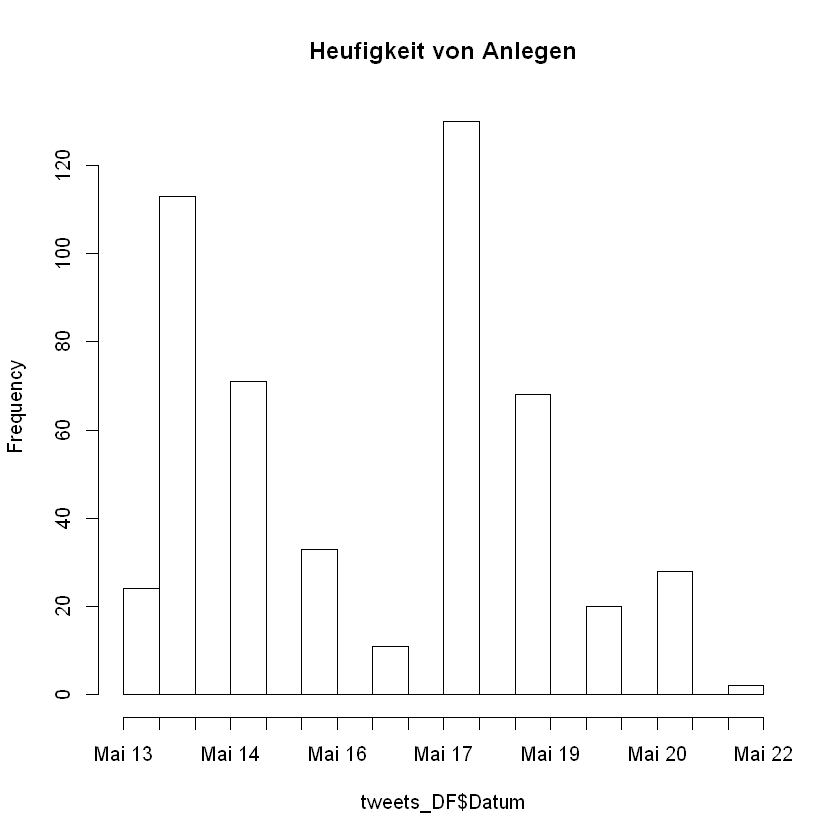

In [16]:
hist(tweets_DF$Datum,breaks=15,freq=TRUE,main="Heufigkeit von Anlegen")

Verktor Ersatz
Diese Verteilung zeigt, dass die Mehrheit der Tweets in dieser Gruppe innerhalb der ersten Sekunden kommt und 
eine viel geringere Anzahl von Tweets in nachfolgenden Zeitintervallen ankommt.
Aus der Verteilung geht hervor, dass die Ankunftszeitverteilung einem Poisson-Verteilungsmuster folgt und es nun möglich ist, 
die Häufigkeit des Auftretens eines Ereignisses in einem bestimmten Zeitintervall zu modellieren.

In [17]:
sorttweetsDF<-tweets_DF[order(as.integer(tweets_DF$Datum)),]
dim(sorttweetsDF) 

[1] 500  17

#### Die zweite Diagram, die Häufigkeit des Auftretens eines Ereignisses in einem bestimmten Zeitintervall

#### Corupt zu anlegen. Corupt ist collection von Texten

convert myCorpus into lowercase

In [20]:
myCorpus <- Corpus(VectorSource(sorttweetsDF$text))

In [22]:
myCorpus <- tm_map(myCorpus, content_transformer(tolower))
myCorpus <- tm_map(myCorpus, function(x) iconv(enc2utf8(x), sub = "byte"))

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(myCorpus, function(x) iconv(enc2utf8(x), :
"transformation drops documents"


löschen punctuation

In [23]:
myCorpus <- tm_map(myCorpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
"transformation drops documents"


In [24]:
myCorpus <- tm_map(myCorpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(myCorpus, removeNumbers):
"transformation drops documents"


In [25]:
Textprocessing <- function(x)
{gsub("http[[:alnum:]]*",'', x)
  gsub('http\\S+\\s*', '', x) ## Remove URLs
  gsub('\\b+RT', '', x) ## Remove RT
  gsub('#\\S+', '', x) ## Remove Hashtags
  gsub('@\\S+', '', x) ## Remove Mentions
  gsub('[[:cntrl:]]', '', x) ## Remove Controls and special characters
  gsub("\\d", '', x) ## Remove Controls and special characters
  gsub('[[:punct:]]', '', x) ## Remove Punctuations
  gsub("^[[:space:]]*","",x) ## Remove leading whitespaces
  gsub("[[:space:]]*$","",x) ## Remove trailing whitespaces
  gsub(' +',' ',x) ## Remove extra whitespaces
  gsub("#[A-Za-z0-9]+|@[A-Za-z0-9]+|\\w+(?:\\.\\w+)*/\\S+", "", x)
 }

In [26]:
myCorpus <- tm_map(myCorpus,Textprocessing)

Warning message in tm_map.SimpleCorpus(myCorpus, Textprocessing):
"transformation drops documents"


In [27]:
myCorpus <- tm_map(myCorpus, stripWhitespace)

Warning message in tm_map.SimpleCorpus(myCorpus, stripWhitespace):
"transformation drops documents"


hinzufügen stopwords
stopwords sind Wörter , dich nicht segnifikant

In [28]:
mystopwords <- c(stopwords("english"),"rt","íí","get","like","just","yes","know","will","good","day","people")

In [ ]:
löschen stopwords

In [29]:
myCorpus <- tm_map(myCorpus,removeWords,mystopwords)

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, mystopwords):
"transformation drops documents"


In [30]:
myCorpus_copy <- myCorpus

In [31]:
for (i in c(1:2, 460)){
  cat(paste0("[", i, "] "))
  writeLines(strwrap(as.character(myCorpus_copy[[i]]), 60))}

[1] tobilindh looks tesla preparing piling gigaberlin site
still busy pm new generators w
[2] gftesla night shift gigaberlin tesla pushes speed
httpstcofzydevmp
[460] luxembourg raises ev incentives sales delivery tesla
httpstcowzthi


In [32]:
myCorpus <- tm_map(myCorpus, stemCompletion, dictionary=myCorpus_copy)
myCorpus <- Corpus(VectorSource(myCorpus))
myCorpus <- iconv(x = myCorpus,"latin1","UTF-8",sub = "")
myCorpus <- iconv(x = myCorpus,"UTF-16LE", "UTF-8",sub = "")

Warning message in tm_map.SimpleCorpus(myCorpus, stemCompletion, dictionary = myCorpus_copy):
"transformation drops documents"


In [33]:
tdm <- TermDocumentMatrix(myCorpus_copy,control = list(wordlengths = c(1,Inf)))
tdm

<<TermDocumentMatrix (terms: 398, documents: 500)>>
Non-/sparse entries: 5707/193293
Sparsity           : 97%
Maximal term length: 18
Weighting          : term frequency (tf)

In [34]:
#freq.terms <- findFreqTerms(tdm, lowfreq =  50)
freq.terms <- findFreqTerms(tdm)
freq.terms 

[1] "busy"               "generators"         "gigaberlin"        
  [4] "looks"              "new"                "piling"            
  [7] "preparing"          "site"               "still"             
 [10] "tesla"              "tobilindh"          "gftesla"           
 [13] "httpstcofzydevmp"   "night"              "pushes"            
 [16] "shift"              "speed"              "construction"      
 [19] "delivered"          "gravel"             "great"             
 [22] "lot"                "mai"                "progress"          
 [25] "adding"             "forward"            "httpstcociruhkgk"  
 [28] "moving"             "sign"               "things"            
 [31] "watch"              "gen"                "httpstcohmlpmlrgup"
 [34] "bulldoze"           "gigafactory"        "interesting"       
 [37] "saw"                "siteseeing"         "tiny"              
 [40] "train"              "yesterday"          "building"          
 [43] "found"              "gigafactories"      "included"          
 [46] "now"                "overview"           "reddit"            
 [49] "scaled"             "updated"            "deserves"          
 [52] "driver"             "drone"              "duration"          
 [55] "first"              "long"               "pile"              
 [58] "thats"              "video"              "view"              
 [61] "yout"               "anyone"             "footage"           
 [64] "htt"                "httpstcolnwbcs"     "model"             
 [67] "spot"               "assessment"         "environmental"     
 [70] "httpstcoysszxqofe"  "impact"             "httpstconfavbvxixh"
 [73] "build"              "days"               "deliver"           
 [76] "may"                "monday"             "thursday"          
 [79] "trains"             "week"               "area"              
 [82] "daily"              "large"              "northeastern"      
 [85] "part"               "prepared"           "update"            
 [88] "application"        "foun"               "involve"           
 [91] "mainly"             "preparations"       "shallow"           
 [94] "submits"            "third"              "future"            
 [97] "gigaberli"          "outlines"           "progressing"       
[100] "rapidly"            "roads"              "httpstcobpofncyai" 
[103] "httpstcocxwvdhfna"  "development"        "entering"          
[106] "httpstcoythxzqjj"   "huge"               "pilephrase"        
[109] "read"               "torquenewsauto"     "wat"               
[112] "httpstcofujnysko"   "mod"                "httpstcogeopcml"   
[115] "httpstcogqxwmzuk"   "pils"               "via"               
[118] "youtube"            "httpstcoyranxrrbr"  "gigashanghai"      
[121] "httpstcolfjhenufoj" "lonely"             "notchinaspeed"     
[124] "amp"                "casti"              "die"               
[127] "electric"           "equipment"          "gfilche"           
[130] "httpstcorjgxcqk"    "job"                "melting"           
[133] "posting"            "bright"             "electrificati"     
[136] "freshly"            "polished"           "see"               
[139] "shines"             "track"              "direct"            
[142] "httpstcokeqockjfj"  "article"            "come"              
[145] "elonmusk"           "end"                "headline"          
[148] "httpstcofharrbo"    "ive"                "wants"             
[151] "concerning"         "expect"             "httpstcoshxzochm"  
[154] "improved"           "logistics"          "nextmovede"        
[157] "parts"              "service"            "soon"              
[160] "spare"              "ele"                "httpstcoswtddolprh"
[163] "httpstcolrovjgqudo" "message"            "sending"           
[166] "size"               "think"              "garage"            
[169] "httpstcodhodbmtajn" "knows"              "place"             
[172] "store"              "amazing"            "httpstcovhjpfmjc"  


In [36]:
termFreq <- rowSums(as.matrix(tdm))

In [37]:
df <- data.frame(term = names(termFreq), freq = termFreq)

Filter

In [40]:
v_df <- head(df,10) 

#### Die zweite Diagram, wie oft die Wörter benutzt werden

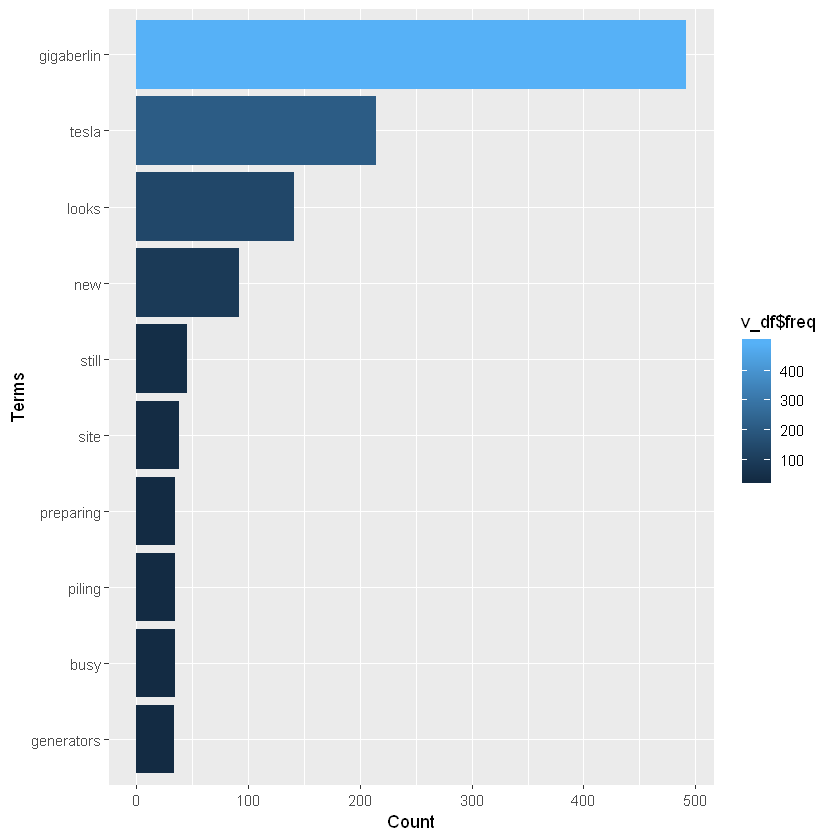

In [42]:
ggplot(v_df,aes(x = reorder(v_df$term, +v_df$freq), y = freq, fill=v_df$freq)) + geom_bar(stat = "identity") +
  scale_colour_gradientn(colors = terrain.colors(10)) + xlab("Terms") + ylab("Count") + coord_flip()

In [43]:
m <- as.matrix(tdm)

In [44]:
m

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
busy,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
generators,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
gigaberlin,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,0,1,1
looks,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
new,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
piling,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
preparing,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
site,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
still,1,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
tesla,1,1,1,1,0,1,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1


In [ ]:
Die Ermittlung der frequency von Wörter

In [45]:
word.freq <- sort(rowSums(m), decreasing = T)
word.freq

gigaberlin              tesla        gigafactory            gftesla 
               492                214                157                142 
             looks               pile             driver          tobilindh 
               141                122                115                114 
             video                new              first              drone 
               104                 92                 89                 85 
            gravel                now               area              today 
                82                 73                 73                 72 
               may           deserves           duration               long 
                68                 65                 65                 65 
             thats               view               yout           building 
                65                 65                 64                 52 
             daily              still           prepared             update 
                47                 45                 44                 44 
           morning              piles               site           overview 
                44                 40                 38                 37 
            monday              found      gigafactories           included 
                37                 36                 36                 36 
            reddit             scaled            updated               busy 
                36                 36                 36                 35 
            piling          preparing           progress              train 
                35                 35                 35                 35 
        generators              think             escape         excavation 
                34                 34                 32                 32 
           httpstc         prepairing            tunnels            storage 
                32                 32                 32                 32 
          germanys            largest        preparation            sandbox 
                31                 31                 31                 31 
             large              watch       northeastern               part 
                29                 28                 28                 27 
               see       construction            footage                fly 
                24                 21                 20                 20 
         delivered             anyone             future          gigaberli 
                19                 19                 19                 19 
    httpstcolnwbcs              model               spot            lizards 
                18                 18                 18                 18 
            almost            anymore               dont            mention 
                18                 18                 18                 18 
              need           delivery         incentives         luxembourg 
                18                 18                 18                 18 
            raises              sales              great                htt 
                18                 18                 17                 17 
           youtube              berlu             bright            freshly 
                17                 17                 16                 16 
          polished             shines              track            arrived 
                16                 16                 16                 16 
              full               make              short           tomorrow 
                16                 16                 16                 16 
            ground               fast             pretty               sure 
                16                 16                 16                 16 
              work          yesterday      electrificati              comes 
                16                 15                 15                 15 
    

#### Wordcloud

In [46]:
wordcloud2(df, color = "random-dark", backgroundColor = "white")

HTML widgets cannot be represented in plain text (need html)